In [78]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [79]:
data=pd.read_csv('/kaggle/input/usa-real-estate-dataset/realtor-data.zip.csv')
data=pd.DataFrame(data)
data.head()


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [80]:
data.shape

(2226382, 12)

In [81]:
data=data.dropna(subset=['price'])

In [82]:
data.shape

(2224841, 12)

In [83]:
missing_groups = data.groupby('city')['bed'].apply(lambda x: x.isna().all())
print(missing_groups[missing_groups])


city
139th Ave Unit Peck    True
15th Ave Milton        True
177th Ave Wabasha      True
178th Ave Wabasha      True
1st Saint              True
                       ... 
Zena                   True
Zinc                   True
Zion Mountain          True
Zortman                True
Zwingle                True
Name: bed, Length: 2395, dtype: bool


In [84]:
import numpy as np

# List of numerical columns to handle missing values
num_features = ['bed', 'bath', 'acre_lot', 'house_size']

# Iterate over each numerical column
for col in num_features:
    # Calculate the overall median of the column (ignoring NaNs)
    overall_median = data[col].median()

    # Define a function to fill missing values within each group
    def fill_missing(x):
        # Median for the current group
        group_median = x.median()
        # Check if the group median is NaN (group is empty or all NaN)
        if np.isnan(group_median):
            return x.fillna(overall_median)  # Use overall median as fallback
        return x.fillna(group_median)  # Otherwise, use group median

    # Apply the function to fill missing values
    data[col] = data.groupby('city')[col].transform(fill_missing)


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

In [85]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Encode 'street' as integers
encoder = LabelEncoder()
data['street_encoded'] = encoder.fit_transform(data['street'].astype(str))

# Use city or other features to predict 'street_encoded'
imputer = SimpleImputer(strategy='most_frequent')
data['street_encoded'] = imputer.fit_transform(data[['street_encoded']])

# Decode back to original 'street' labels
data['street'] = encoder.inverse_transform(data['street_encoded'])
data.drop(columns=['street_encoded'], inplace=True)


Let's break down the code step by step, along with explanations of the concepts used:

---

### **1. Importing Modules**
```python
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
```
- **`SimpleImputer`**:
  - A class from `sklearn` used to fill (or impute) missing values in a dataset.
  - It offers strategies like replacing missing values with the mean, median, or most frequent value.

- **`LabelEncoder`**:
  - Converts categorical labels (strings) into numerical values.
  - This is useful for machine learning algorithms that can only work with numerical data.

---

### **2. Encoding `street` as Integers**
```python
encoder = LabelEncoder()
data['street_encoded'] = encoder.fit_transform(data['street'].astype(str))
```
- **What it does**:
  - Converts the `street` column (categorical) into numeric values by assigning a unique integer to each unique label (e.g., `['Main St', 'Elm St', 'Park Ave'] → [0, 1, 2]`).
  - **`astype(str)`** ensures that even `NaN` values are treated as strings, avoiding errors during encoding.

- **Key Methods**:
  - **`fit_transform`**:
    - Learns the mapping of unique labels to integers (via `fit`) and applies the transformation (via `transform`) in one step.
    - Example mapping:
      ```
      'Main St' → 0
      'Elm St' → 1
      'Park Ave' → 2
      NaN → 3
      ```

---

### **3. Handling Missing Values with `SimpleImputer`**
```python
imputer = SimpleImputer(strategy='most_frequent')
data['street_encoded'] = imputer.fit_transform(data[['street_encoded']])
```
- **What it does**:
  - Fills the missing values (`NaN`) in the `street_encoded` column using the most frequent value (mode).
  - If a column has missing values, this method replaces them with the most common value in that column.

- **Key Methods**:
  - **`fit`**:
    - Learns the most frequent value in the column.
  - **`transform`**:
    - Replaces missing values with the learned value.
  - **Example**:
    ```
    Original:
    street_encoded: [0, 1, NaN, 1, 2, NaN]
    Most Frequent Value (mode): 1
    After Imputation:
    street_encoded: [0, 1, 1, 1, 2, 1]
    ```

---

### **4. Decoding Back to Original Labels**
```python
data['street'] = encoder.inverse_transform(data['street_encoded'])
```
- **What it does**:
  - Converts the numeric `street_encoded` values back to their original string labels.
  - Uses the mapping learned during the `fit_transform` step of the `LabelEncoder`.

- **Key Method**:
  - **`inverse_transform`**:
    - Maps integers back to their original labels (e.g., `[0, 1, 2] → ['Main St', 'Elm St', 'Park Ave']`).

---

### **5. Cleaning Up**
```python
data.drop(columns=['street_encoded'], inplace=True)
```
- **What it does**:
  - Removes the temporary `street_encoded` column, as it's no longer needed.
  - **`inplace=True`** ensures the changes are applied directly to the `data` dataframe without creating a new copy.

---

### **Why This Process?**
This process is necessary because machine learning models require numerical data, and missing values cannot be directly handled by most algorithms. Here's how each step contributes:
1. **Encoding categorical data**:
   - Converts strings to integers so they can be processed.
2. **Imputing missing values**:
   - Replaces missing values with logical alternatives (e.g., mode) to avoid issues during model training.
3. **Decoding back**:
   - Converts numbers back to their original labels for human readability or downstream tasks.

---

### **Example Walkthrough**
**Input Data (`data['street']`)**:
```
['Main St', 'Elm St', NaN, 'Elm St', 'Park Ave', NaN]
```

1. **Encoded (`street_encoded`)**:
```
[0, 1, 3 (for NaN), 1, 2, 3]
```

2. **Imputed (`street_encoded`)**:
```
[0, 1, 1, 1, 2, 1]  (NaNs replaced with mode = 1)
```

3. **Decoded (`street`)**:
```
['Main St', 'Elm St', 'Elm St', 'Elm St', 'Park Ave', 'Elm St']
```

---

### **Advantages of This Approach**:
- Handles both **missing values** and **categorical data** in a structured manner.
- Allows categorical data to be imputed without complex logic.
- Decodes back to original labels for interpretability.

Let me know if you'd like further clarification!

In [86]:
data.isnull().sum()

brokered_by         4533
status                 0
price                  0
bed                 1404
bath                1404
acre_lot            1404
street                 0
city                1404
state                  8
zip_code             298
house_size          1404
prev_sold_date    733256
dtype: int64

In [87]:
data.drop(columns=['prev_sold_date'],inplace=True)

In [88]:
data.drop_duplicates(inplace=True)

In [89]:
data.shape

(2224003, 11)

In [90]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Initialize the dictionary to hold encoders
encoders = {}

# List of categorical features
categorical_features = ['city', 'state', 'status', 'brokered_by']

# Iterate over the categorical features and encode them
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    encoders[feature] = le  # Save the encoder

# Save the encoders to disk
for feature, encoder in encoders.items():
    joblib.dump(encoder, f'{feature}_encoder.pkl')
    print(f'{feature} encoder saved to {feature}_encoder.pkl')


city encoder saved to city_encoder.pkl
state encoder saved to state_encoder.pkl
status encoder saved to status_encoder.pkl
brokered_by encoder saved to brokered_by_encoder.pkl


In [91]:
# Calculate the IQR for each feature
num_features=['bed', 'bath', 'house_size', 'acre_lot', 'zip_code', 'price']

for column in num_features:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Remove outliers
    data= data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


In [92]:
data.shape

(1553009, 11)

In [93]:
# Identify numerical features (exclude label-encoded columns if necessary)
numerical_features = ['bed', 'bath', 'house_size', 'acre_lot', 'zip_code', 'price']  # Update based on your data

# Check skewness only on numerical columns
skewness = data[numerical_features].skew()
print(skewness)


bed           0.382421
bath          0.348884
house_size    0.512836
acre_lot      1.939072
zip_code      0.133816
price         0.703359
dtype: float64


In [94]:
import numpy as np

# Apply log transformation (be sure to add 1 to avoid log(0) issues)
data['bed_log'] = np.log1p(data['bed'])  # log(x + 1)
data['bath_log'] = np.log1p(data['bath'])
data['house_size_log'] = np.log1p(data['house_size'])
data['acre_lot_log'] = np.log1p(data['acre_lot'])
data['price_log'] = np.log1p(data['price'])

# Check skewness again
print(data[['bed_log', 'bath_log', 'house_size_log', 'acre_lot_log', 'price_log']].skew())


bed_log          -0.104308
bath_log         -0.313873
house_size_log   -0.396963
acre_lot_log      1.496216
price_log        -1.756590
dtype: float64


In [95]:
# Apply square root transformation to acre_lot
data['acre_lot_sqrt'] = np.sqrt(data['acre_lot'])

# Check the skewness after square root transformation
print(data[['acre_lot_sqrt']].skew())


acre_lot_sqrt    1.073928
dtype: float64


In [96]:
# Apply cube root transformation to acre_lot
data['acre_lot_cbrt'] = np.cbrt(data['acre_lot'])

# Check the skewness after cube root transformation
print(data[['acre_lot_cbrt']].skew())


acre_lot_cbrt    0.669182
dtype: float64


In [97]:
# Apply square root transformation to price_lot
data['price_sqrt'] = np.sqrt(data['price'])

# Check the skewness after square root transformation
print(data[['price_sqrt']].skew())


price_sqrt   -0.13763
dtype: float64


In [98]:
data.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,bed_log,bath_log,house_size_log,acre_lot_log,price_log,acre_lot_sqrt,acre_lot_cbrt,price_sqrt
0,103359,0,105000.0,3.0,2.0,0.12,1962661.0,92,41,601.0,920.0,1.386294,1.098612,6.825460,0.113329,11.561725,0.346410,0.493242,324.037035
1,52693,0,80000.0,4.0,2.0,0.08,1902874.0,92,41,601.0,1527.0,1.609438,1.098612,7.331715,0.076961,11.289794,0.282843,0.430887,282.842712
2,103360,0,67000.0,2.0,1.0,0.15,1404990.0,8784,41,795.0,748.0,1.098612,0.693147,6.618739,0.139762,11.112463,0.387298,0.531329,258.843582
3,31232,0,145000.0,4.0,2.0,0.10,1947675.0,14306,41,731.0,1800.0,1.609438,1.098612,7.496097,0.095310,11.884496,0.316228,0.464159,380.788655
5,103359,0,179000.0,4.0,3.0,0.46,1850806.0,15862,41,612.0,2520.0,1.609438,1.386294,7.832411,0.378436,12.095147,0.678233,0.771944,423.083916


In [99]:
data.drop(columns=['price_log','acre_lot_sqrt','price','acre_lot_log','acre_lot','bed','bath','house_size'],axis=1,inplace=True)

In [100]:
data.head()

,brokered_by,status,street,city,state,zip_code,bed_log,bath_log,house_size_log,acre_lot_cbrt,price_sqrt
0,103359,0,1962661.0,92,41,601.0,1.386294,1.098612,6.825460,0.493242,324.037035
1,52693,0,1902874.0,92,41,601.0,1.609438,1.098612,7.331715,0.430887,282.842712
2,103360,0,1404990.0,8784,41,795.0,1.098612,0.693147,6.618739,0.531329,258.843582
3,31232,0,1947675.0,14306,41,731.0,1.609438,1.098612,7.496097,0.464159,380.788655
5,103359,0,1850806.0,15862,41,612.0,1.609438,1.386294,7.832411,0.771944,423.083916


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1553009 entries, 0 to 2226380
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   brokered_by     1553009 non-null  int64  
 1   status          1553009 non-null  int64  
 2   street          1553009 non-null  object 
 3   city            1553009 non-null  int64  
 4   state           1553009 non-null  int64  
 5   zip_code        1553009 non-null  float64
 6   bed_log         1553009 non-null  float64
 7   bath_log        1553009 non-null  float64
 8   house_size_log  1553009 non-null  float64
 9   acre_lot_cbrt   1553009 non-null  float64
 10  price_sqrt      1553009 non-null  float64
dtypes: float64(6), int64(4), object(1)
memory usage: 142.2+ MB


In [102]:
from sklearn.preprocessing import StandardScaler
columns_to_scale = ['zip_code', 'bed_log', 'bath_log', 'house_size_log', 'acre_lot_cbrt', 'price_sqrt']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the selected columns
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Display the scaled DataFrame
data.head()

,brokered_by,status,street,city,state,zip_code,bed_log,bath_log,house_size_log,acre_lot_cbrt,price_sqrt
0,103359,0,1962661.0,92,41,-1.814897,-0.063772,-0.230391,-1.796215,-0.755004,-0.996061
1,52693,0,1902874.0,92,41,-1.814897,1.197506,-0.230391,-0.248733,-1.093096,-1.197405
2,103360,0,1404990.0,8784,41,-1.808005,-1.689842,-2.008499,-2.428105,-0.548496,-1.314706
3,31232,0,1947675.0,14306,41,-1.810279,1.197506,-0.230391,0.253739,-0.912695,-0.718677
5,103359,0,1850806.0,15862,41,-1.814506,1.197506,1.031196,1.281758,0.756124,-0.511951


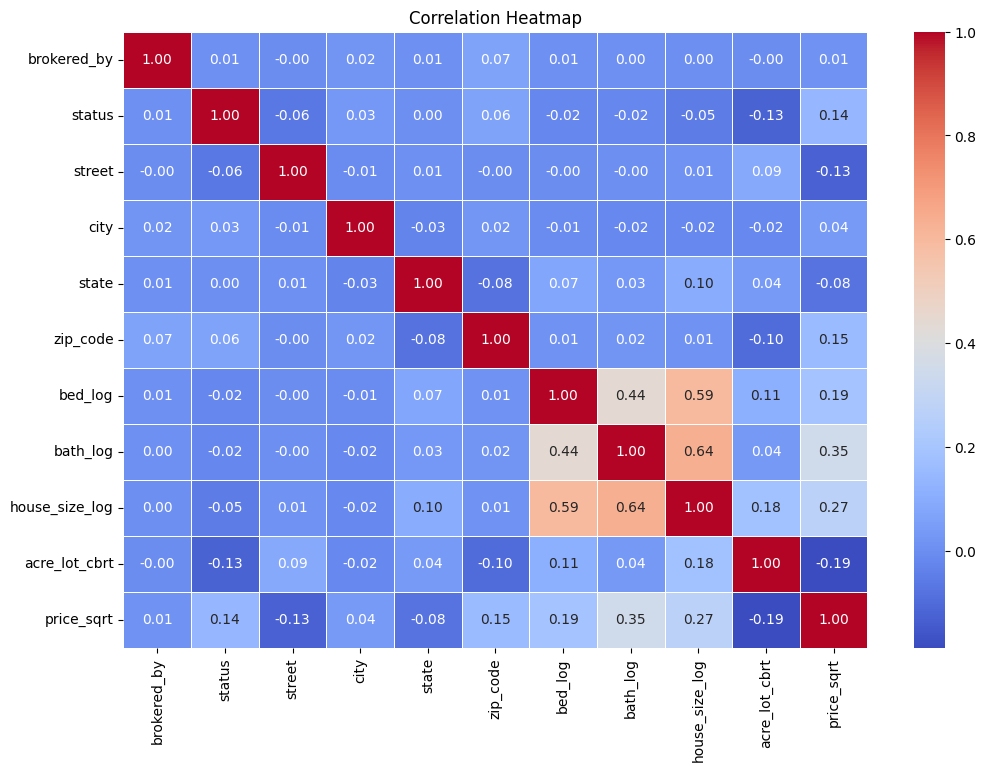

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [104]:
data['street'] = pd.to_numeric(data['street'], errors='coerce')


In [105]:
data.isnull().sum()

brokered_by          0
status               0
street            6101
city                 0
state                0
zip_code             0
bed_log              0
bath_log             0
house_size_log       0
acre_lot_cbrt        0
price_sqrt           0
dtype: int64

In [106]:
# Drop rows where 'street' column has NaN values
data = data.dropna(subset=['street'])


In [107]:
data.isnull().sum()

brokered_by       0
status            0
street            0
city              0
state             0
zip_code          0
bed_log           0
bath_log          0
house_size_log    0
acre_lot_cbrt     0
price_sqrt        0
dtype: int64

In [108]:
data.shape

(1546908, 11)

In [109]:
data['bed_bath_balance']=data['bed_log']*data['bath_log']
data['price_per_sqft']=data['price_sqrt']/data['house_size_log']
data['price_per_bedroom']=data['price_sqrt']/data['bed_log']
data['average_size_room'] = data['house_size_log'] / (data['bed_log'].replace(0, np.nan))
data['bed_bath_ratio'] = data['bed_log'] / (data['bath_log'].replace(0, np.nan))
data['efficient_land_use'] = data['house_size_log'] / (data['acre_lot_cbrt'].replace(0, np.nan))


In [110]:
print(data.isnull().sum())  # Count NaN values
print(np.isinf(data).sum())  # Count infinite values


brokered_by           0
status                0
street                0
city                  0
state                 0
zip_code              0
bed_log               0
bath_log              0
house_size_log        0
acre_lot_cbrt         0
price_sqrt            0
bed_bath_balance      0
price_per_sqft        0
price_per_bedroom     0
average_size_room     0
bed_bath_ratio        0
efficient_land_use    0
dtype: int64
brokered_by           0
status                0
street                0
city                  0
state                 0
zip_code              0
bed_log               0
bath_log              0
house_size_log        0
acre_lot_cbrt         0
price_sqrt            0
bed_bath_balance      0
price_per_sqft        0
price_per_bedroom     0
average_size_room     0
bed_bath_ratio        0
efficient_land_use    0
dtype: int64


In [111]:
# Calculate the IQR for each feature
num_features=['bed_bath_balance', 'average_size_room', 'bed_bath_ratio',
            'efficient_land_use', 'price_per_sqft', 'price_per_bedroom']

for column in num_features:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Remove outliers
    data= data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


In [112]:
data.shape

(528338, 17)

In [113]:
print(data[['bed_bath_balance', 'average_size_room', 'bed_bath_ratio',
            'efficient_land_use', 'price_per_sqft', 'price_per_bedroom']].skew())


bed_bath_balance      1.635632
average_size_room     0.084546
bed_bath_ratio       -0.789056
efficient_land_use   -0.052433
price_per_sqft       -0.206091
price_per_bedroom     0.097644
dtype: float64


In [114]:
data['bed_bath_balance_log'] = np.log1p(data['bed_bath_balance'])
print(data['bed_bath_balance_log'].skew())


0.6946987753691837


In [115]:
print(data[['bed_bath_balance_log', 'average_size_room', 'bed_bath_ratio',
            'efficient_land_use', 'price_per_sqft', 'price_per_bedroom']].skew())


bed_bath_balance_log    0.694699
average_size_room       0.084546
bed_bath_ratio         -0.789056
efficient_land_use     -0.052433
price_per_sqft         -0.206091
price_per_bedroom       0.097644
dtype: float64


In [116]:
data.drop(columns=['bed_bath_balance'],axis=1,inplace=True)

In [117]:
from sklearn.preprocessing import StandardScaler
columns_to_scale = ['bed_bath_balance_log','average_size_room','bed_bath_ratio',
            'efficient_land_use','price_per_sqft','price_per_bedroom']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the selected columns
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Display the scaled DataFrame
data.head()

,brokered_by,status,street,city,state,zip_code,bed_log,bath_log,house_size_log,acre_lot_cbrt,price_sqrt,price_per_sqft,price_per_bedroom,average_size_room,bed_bath_ratio,efficient_land_use,bed_bath_balance_log
17,12874,0,1868721.0,14306,41,-1.810386,-0.063772,-0.230391,-0.303228,-1.093096,-0.996061,1.167726,0.901713,0.537935,0.68345,0.136510,0.283918
35,3605,0,1902855.0,11563,41,-1.812233,-0.063772,-0.230391,0.463613,2.218097,0.119460,0.126512,-0.285468,-0.850110,0.68345,0.065714,0.283918
49,52693,0,1902736.0,115,41,-1.814862,-0.063772,-0.230391,-0.557926,-0.682689,-0.140902,0.124749,-0.008381,0.998958,0.68345,0.695353,0.283918
55,89330,0,1868699.0,115,41,-1.814862,-0.063772,-0.230391,-0.984808,-1.093096,-0.063763,0.060154,-0.090476,1.771649,0.68345,0.781985,0.283918
59,46008,0,1234597.0,115,41,-1.814862,-0.063772,-0.230391,0.796586,1.766462,-1.665449,-0.681234,1.614102,-1.452817,0.68345,0.316164,0.283918


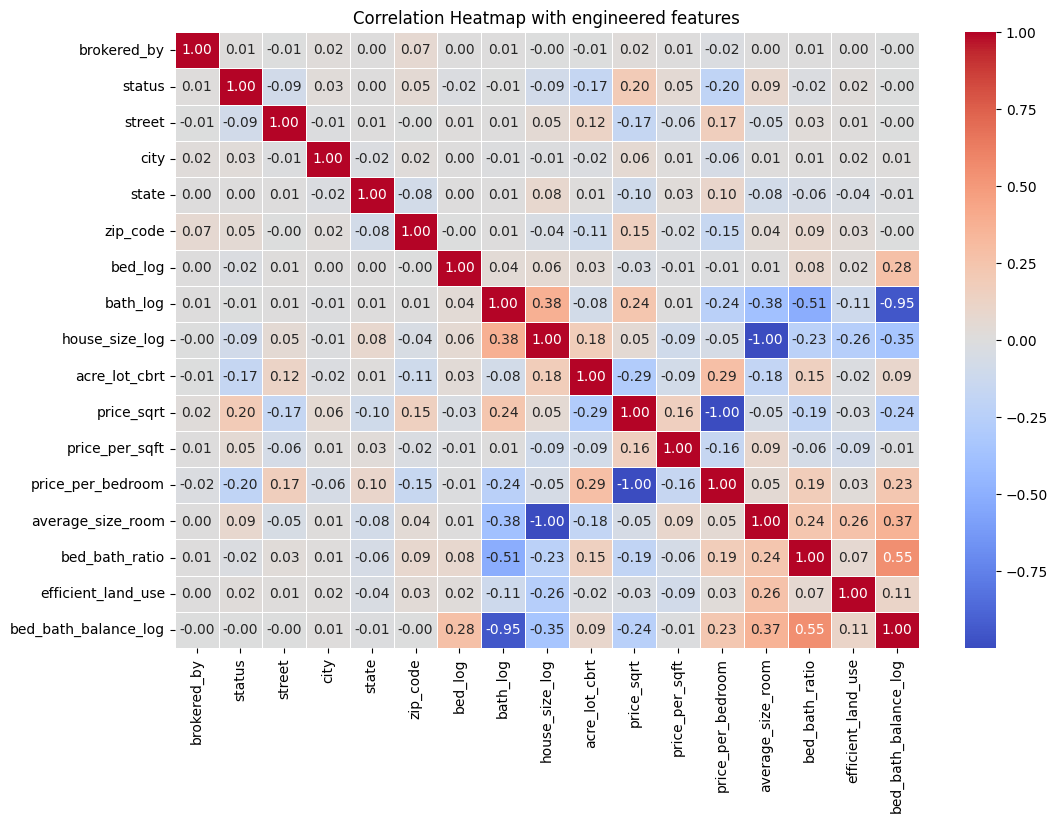

In [118]:
corr_matrix=data.corr()

#plotting heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm",fmt='.2f',linewidth=0.5)
plt.title('Correlation Heatmap with engineered features')
plt.show()

In [119]:
# data=data.drop(columns=['status','brokered_by'],axis=1)
data.head()


,brokered_by,status,street,city,state,zip_code,bed_log,bath_log,house_size_log,acre_lot_cbrt,price_sqrt,price_per_sqft,price_per_bedroom,average_size_room,bed_bath_ratio,efficient_land_use,bed_bath_balance_log
17,12874,0,1868721.0,14306,41,-1.810386,-0.063772,-0.230391,-0.303228,-1.093096,-0.996061,1.167726,0.901713,0.537935,0.68345,0.136510,0.283918
35,3605,0,1902855.0,11563,41,-1.812233,-0.063772,-0.230391,0.463613,2.218097,0.119460,0.126512,-0.285468,-0.850110,0.68345,0.065714,0.283918
49,52693,0,1902736.0,115,41,-1.814862,-0.063772,-0.230391,-0.557926,-0.682689,-0.140902,0.124749,-0.008381,0.998958,0.68345,0.695353,0.283918
55,89330,0,1868699.0,115,41,-1.814862,-0.063772,-0.230391,-0.984808,-1.093096,-0.063763,0.060154,-0.090476,1.771649,0.68345,0.781985,0.283918
59,46008,0,1234597.0,115,41,-1.814862,-0.063772,-0.230391,0.796586,1.766462,-1.665449,-0.681234,1.614102,-1.452817,0.68345,0.316164,0.283918


In [120]:
X=data.drop(columns=['price_sqrt'])
y=data['price_sqrt']

In [121]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=50, n_jobs=-1,max_depth=20,random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
print("Feature Importances:")
print(feature_importances.sort_values(ascending=False))

# Set a threshold and drop features below it
importance_threshold = 0.01  # Adjust as needed
selected_features = feature_importances[feature_importances > importance_threshold].index
X_selected = X[selected_features]


Feature Importances:
price_per_bedroom       9.981131e-01
bed_bath_ratio          8.948052e-04
bed_log                 5.337001e-04
bed_bath_balance_log    4.567918e-04
house_size_log          8.550941e-07
zip_code                3.238749e-07
price_per_sqft          7.670561e-08
efficient_land_use      5.957047e-08
brokered_by             5.820200e-08
street                  4.615777e-08
city                    4.017818e-08
acre_lot_cbrt           4.010483e-08
average_size_room       3.190951e-08
state                   2.550701e-08
status                  9.322621e-09
bath_log                1.878999e-09
dtype: float64


In [122]:
vif_data=data

In [123]:
# Assuming `rf_model` is your trained Random Forest model
import pandas as pd

# Get feature importances from the trained model
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)

# Define a threshold for feature importance
importance_threshold = 0.0001

# Retain only important features
important_features = feature_importance[feature_importance > importance_threshold].index
X_reduced = X[important_features]

# Display important features
print("Important Features Based on Threshold:")
print(important_features)

# Recalculate VIF for remaining features
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Feature"] = X_reduced.columns
vif["VIF"] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]

print("\nVIF After Dropping Low-Importance Features:")
print(vif)


Important Features Based on Threshold:
Index(['bed_log', 'price_per_bedroom', 'bed_bath_ratio',
       'bed_bath_balance_log'],
      dtype='object')

VIF After Dropping Low-Importance Features:
                Feature       VIF
0               bed_log  1.008086
1     price_per_bedroom  1.063375
2        bed_bath_ratio  1.437814
3  bed_bath_balance_log  1.478152


# VIF (Variance Inflation Factor) measures the multicollinearity of features in a dataset.
# It calculates how much the variance of a regression coefficient is inflated due to multicollinearity.
# A high VIF value (generally > 5 or 10) indicates a high correlation between a feature and others, 
# meaning the feature might not provide unique information to the model.

# Steps to calculate VIF:
# 1. For each feature, regress it against all other features.
# 2. Calculate the R² (coefficient of determination) for this regression.
# 3. Compute VIF using the formula: VIF = 1 / (1 - R²)
#    - If R² is close to 1, VIF will be very large, indicating multicollinearity.
#    - Lower VIF values indicate less multicollinearity.

# VIF Thresholds:
# - VIF < 5: Low multicollinearity, the feature is generally fine.
# - VIF 5-10: Moderate multicollinearity, consider dropping or transforming the feature.
# - VIF > 10: High multicollinearity, the feature is likely problematic and should be addressed.

# In this dataset, we calculate VIF for all features to identify multicollinearity issues.
# Features with low VIF values are retained, while features with high VIF may be dropped or transformed.


In [124]:
# Final feature set
X_boosting = X[['city','state','bed_log', 'price_per_bedroom', 'bed_bath_ratio', 'bed_bath_balance_log']]


In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_boosting, y, test_size=0.2, random_state=42)


In [126]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize XGBoost model
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

# Train
xgb_model.fit(X_train, y_train)

# Predict
y_pred = xgb_model.predict(X_test)

# Evaluate
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MSE: 7.890685419193122e-05
R2 Score: 0.9999112774854102


In [127]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
}

grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    verbose=1
)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Best R2 Score: 0.9999217374347952


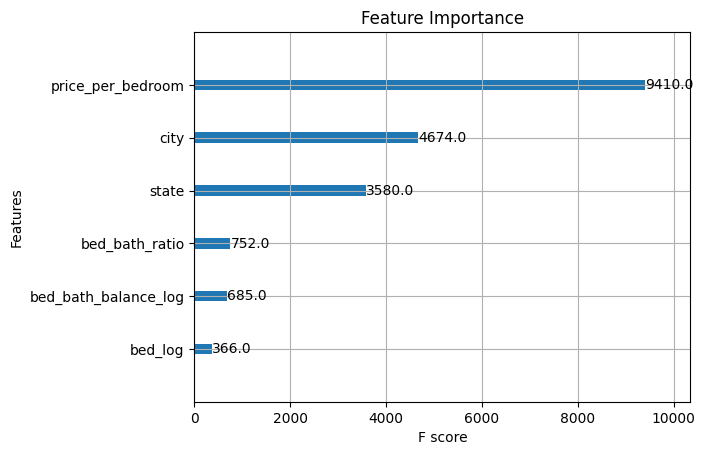

In [128]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Use the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Plot feature importance
plot_importance(best_model, max_num_features=10)  # Top 10 features
plt.title("Feature Importance")
plt.show()


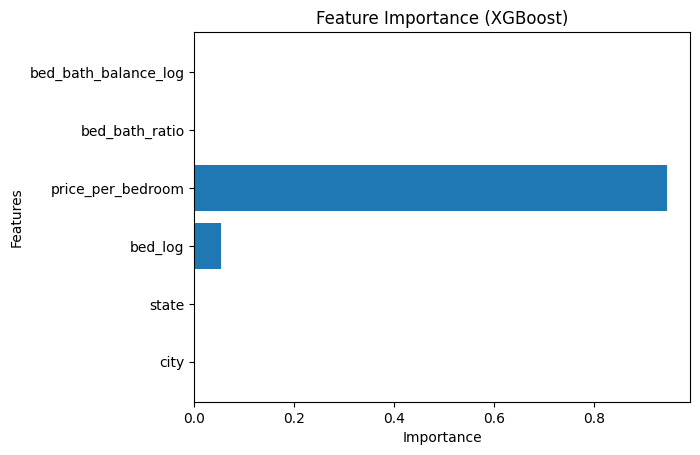

Feature Importance Ranking:
price_per_bedroom: 0.9462407231330872
bed_log: 0.05335328355431557
bed_bath_ratio: 0.00037340589915402234
city: 1.1597544471442234e-05
bed_bath_balance_log: 1.1180732144566718e-05
state: 9.841613973549102e-06


In [129]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance
xgb_importance = best_model.feature_importances_

# Plot importance
plt.barh(X_boosting.columns, xgb_importance)
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Display sorted feature importance
sorted_importance = sorted(zip(X_boosting.columns, xgb_importance), key=lambda x: x[1], reverse=True)
print("Feature Importance Ranking:")
for feature, importance in sorted_importance:
    print(f"{feature}: {importance}")


In [130]:
from sklearn.model_selection import cross_val_score

# Cross-validation
cv_scores = cross_val_score(best_model, X_boosting, y, cv=5, scoring='r2')

print("Cross-Validation R² Scores:", cv_scores)
print("Mean R² Score:", np.mean(cv_scores))


Cross-Validation R² Scores: [0.99990127 0.9998752  0.99990744 0.99992791 0.99986116]
Mean R² Score: 0.9998945951819053


In [131]:
import joblib
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the best hyperparameters based on previous tuning
best_params = {
    'learning_rate': 0.1,
    'max_depth': 5,
    'n_estimators': 300,
    'subsample': 1.0
}

# Retrain the model using the best hyperparameters
final_model = XGBRegressor(**best_params)
final_model.fit(X_train, y_train)

# Save the model to a file
joblib.dump(final_model, 'xgb_final_model.pkl')
print("Model saved to xgb_final_model.pkl")

# Predict on the test set using the trained model
y_pred = final_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test Mean Squared Error: {mse}")
print(f"Test R2 Score: {r2}")

# Optionally, save the model to load later and make predictions
loaded_model = joblib.load('xgb_final_model.pkl')
y_pred_loaded = loaded_model.predict(X_test)

# Check if predictions are the same as before
print(f"Predictions from loaded model are equal to previous predictions: {all(y_pred == y_pred_loaded)}")


Model saved to xgb_final_model.pkl
Test Mean Squared Error: 7.364418397692187e-05
Test R2 Score: 0.9999171948083058
Predictions from loaded model are equal to previous predictions: True


In [132]:
data.head()

,brokered_by,status,street,city,state,zip_code,bed_log,bath_log,house_size_log,acre_lot_cbrt,price_sqrt,price_per_sqft,price_per_bedroom,average_size_room,bed_bath_ratio,efficient_land_use,bed_bath_balance_log
17,12874,0,1868721.0,14306,41,-1.810386,-0.063772,-0.230391,-0.303228,-1.093096,-0.996061,1.167726,0.901713,0.537935,0.68345,0.136510,0.283918
35,3605,0,1902855.0,11563,41,-1.812233,-0.063772,-0.230391,0.463613,2.218097,0.119460,0.126512,-0.285468,-0.850110,0.68345,0.065714,0.283918
49,52693,0,1902736.0,115,41,-1.814862,-0.063772,-0.230391,-0.557926,-0.682689,-0.140902,0.124749,-0.008381,0.998958,0.68345,0.695353,0.283918
55,89330,0,1868699.0,115,41,-1.814862,-0.063772,-0.230391,-0.984808,-1.093096,-0.063763,0.060154,-0.090476,1.771649,0.68345,0.781985,0.283918
59,46008,0,1234597.0,115,41,-1.814862,-0.063772,-0.230391,0.796586,1.766462,-1.665449,-0.681234,1.614102,-1.452817,0.68345,0.316164,0.283918


In [133]:
data['city'].skew()

-0.027902399889904998